# Load dataset from DataCube of GISTDA ODC STAC <img align="right" src="image/gistda.png" width="200" height="150">

## Import Required Packages

In [1]:
from pystac_client import Client
from Godream.plotimg import show_map
import matplotlib.pyplot as plt
from odc.stac import  stac_load

## Connect to the Gistda ODC STAC Catalog

In [2]:
# Open the stac catalogue
catalog = Client.open("http://122.155.222.239:6117/stac")

## Find STAC items to load

### Define query parameters

In [3]:
# Set a bounding box
# define AOI
lat = 11.800
lon = 99.790

# buffer distance
lon_buffer = 0.05
lat_buffer = 0.05

# [xmin, ymin, xmax, ymax] in latitude and longitude
bbox = (lon-lon_buffer, lat-lat_buffer, lon+lon_buffer, lat+lat_buffer)

# Set a start and end date
start_date = "2022-01-01"
end_date = "2022-03-30"

# Set the STAC collections
collections = ["LANDSAT9_SR_C2L2"]

### Construct query and get items from catalog

In [4]:
# Build a query with the set parameters
query = catalog.search(
    bbox=bbox, collections=collections, datetime=f"{start_date}/{end_date}"
)

# Search the STAC catalog for all items matching the query
items = list(query.items())
print(f"Found: {len(items):d} datasets")

Found: 5 datasets


### Display study area

In [5]:
show_map(lat, lon, zoom = 13)

## Load the Data

In this step, we specify the desired coordinate system, resolution (here 20m), and bands to load. We also pass the bounding box to the `stac_load` function to only load the requested data. Since the band aliases are contained in the config dictionary, bands can be loaded using these aliaes (e.g. `"red"` instead of `"B04"` below).

In [6]:
ds = stac_load(
    items,
    bands=("red", "green", "blue", "nir"),
    groupby="solar_day",
    bbox=bbox,
)

# View the Xarray Dataset
ds

<xarray.Dataset> Size: 11MB
Dimensions:      (y: 370, x: 366, time: 5)
Coordinates:
  * y            (y) float64 3kB 1.31e+06 1.31e+06 ... 1.299e+06 1.299e+06
  * x            (x) float64 3kB 5.806e+05 5.806e+05 ... 5.915e+05 5.915e+05
    spatial_ref  int32 4B 32647
  * time         (time) datetime64[ns] 40B 2022-01-15T03:38:48 ... 2022-03-20...
Data variables:
    red          (time, y, x) float32 3MB 8.978e+03 8.37e+03 ... 6.18e+03
    green        (time, y, x) float32 3MB 9.138e+03 8.505e+03 ... 5.927e+03
    blue         (time, y, x) float32 3MB 8.153e+03 7.507e+03 ... 3.981e+03
    nir          (time, y, x) float32 3MB 1.288e+04 1.286e+04 ... 8.646e+03

### Compute a band index

In [7]:
ds["NDVI"] = (ds.nir - ds.red) / (ds.nir + ds.red)

ds

<xarray.Dataset> Size: 14MB
Dimensions:      (y: 370, x: 366, time: 5)
Coordinates:
  * y            (y) float64 3kB 1.31e+06 1.31e+06 ... 1.299e+06 1.299e+06
  * x            (x) float64 3kB 5.806e+05 5.806e+05 ... 5.915e+05 5.915e+05
    spatial_ref  int32 4B 32647
  * time         (time) datetime64[ns] 40B 2022-01-15T03:38:48 ... 2022-03-20...
Data variables:
    red          (time, y, x) float32 3MB 8.978e+03 8.37e+03 ... 6.18e+03
    green        (time, y, x) float32 3MB 9.138e+03 8.505e+03 ... 5.927e+03
    blue         (time, y, x) float32 3MB 8.153e+03 7.507e+03 ... 3.981e+03
    nir          (time, y, x) float32 3MB 1.288e+04 1.286e+04 ... 8.646e+03
    NDVI         (time, y, x) float32 3MB 0.1786 0.2114 0.2376 ... 0.1647 0.1663

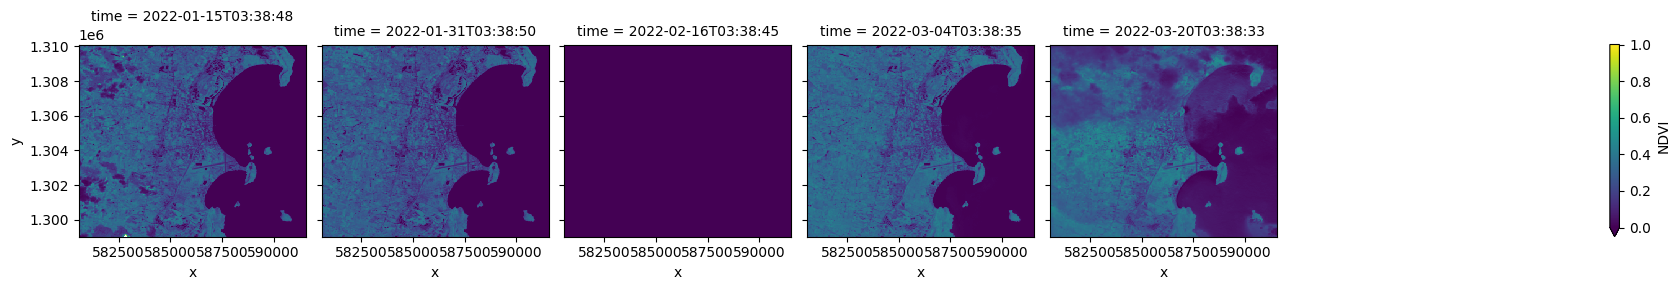

In [8]:
ds.NDVI.compute().plot(col="time", col_wrap=6, vmin=0, vmax=1)